In [53]:
import numpy as np
import math
from random import seed
from random import random
from numba import jit


from functions import read_tsp_file
from functions import comp_shortest_path

## Markov chain length - 10,000

In [7]:
T_start = 1000
T_end = 0.005
cooling_factor_arr = [0.5,0.6,0.7,0.8,0.9,0.98,0.99]
nMarkov = 10000
num_simulations = 10

coords = read_tsp_file("TSP-Configurations/a280.tsp")
dataset = "a280"

for cooling_factor in cooling_factor_arr:
    print("cooling factor : ",cooling_factor)
    print("\n")
    for run in range(num_simulations):
        print("Simulation run :",run)
        itr, min_cost, optimal_list_cities,local_minima_arr = comp_shortest_path(T_start, T_end, cooling_factor, nMarkov, coords, dataset=dataset, save_data=True)
        print("Minimum route Cost : ",min_cost)
    print("\n")
    

cooling factor :  0.5


Simulation run : 0
Minimum route Cost :  3034.438875075891
Simulation run : 1
Minimum route Cost :  3090.1875359885767
Simulation run : 2
Minimum route Cost :  3123.9088564524404
Simulation run : 3
Minimum route Cost :  3094.5391687317474
Simulation run : 4
Minimum route Cost :  3075.473661108477
Simulation run : 5
Minimum route Cost :  3142.3757203778136
Simulation run : 6
Minimum route Cost :  3148.9261407671543
Simulation run : 7
Minimum route Cost :  3149.372155945167
Simulation run : 8
Minimum route Cost :  3145.730488229444
Simulation run : 9
Minimum route Cost :  2936.377943929884


cooling factor :  0.6


Simulation run : 0
Minimum route Cost :  2975.8891757970364
Simulation run : 1
Minimum route Cost :  3061.123139307801
Simulation run : 2
Minimum route Cost :  2925.1030352450225
Simulation run : 3
Minimum route Cost :  3107.9939848623076
Simulation run : 4
Minimum route Cost :  3037.4691376403184
Simulation run : 5
Minimum route Cost :  3074.2384510038

## Shortest Route Cost (Given)

In [26]:
def read_opt_tsp_file(tsp_file):
    coords = []
    datafile = open(tsp_file,"r")

    while(1):
        line = datafile.readline()
        if "TOUR_SECTION" in line:
            break

    while(1):
        line = datafile.readline()
        if "-1" in line:
            break
        lineList = line.split()

        node = int(lineList[0])
        coords.append(node)
    # Add node-1 at the end to finish the route
    coords.append(1)
    datafile.close()
    return coords

route = read_opt_tsp_file("TSP-Configurations/a280.opt.tour")
#print(route)

from functions import distance_matrix
from functions import read_tsp_file

coords = read_tsp_file("TSP-Configurations/a280.tsp")
dis_matrix = distance_matrix(coords)

num_nodes = len(route)
total_dis = 0
for i in range(num_nodes-1):
    n1 = route[i]
    n2 = route[i+1]
    total_dis += dis_matrix[n1-1][n2-1]

print("Given cost of shortest route: ",total_dis)

Given cost of shortest route:  2586.7696475631606


## Data Analysis - Markov chain length - 10,000

In [52]:
from pandas import read_csv

File_Path = "data/TSP_SA_280data_mk=10000_cf=[0.5,0.99].csv"
df_1 = read_csv(File_Path)
#df_1.head()

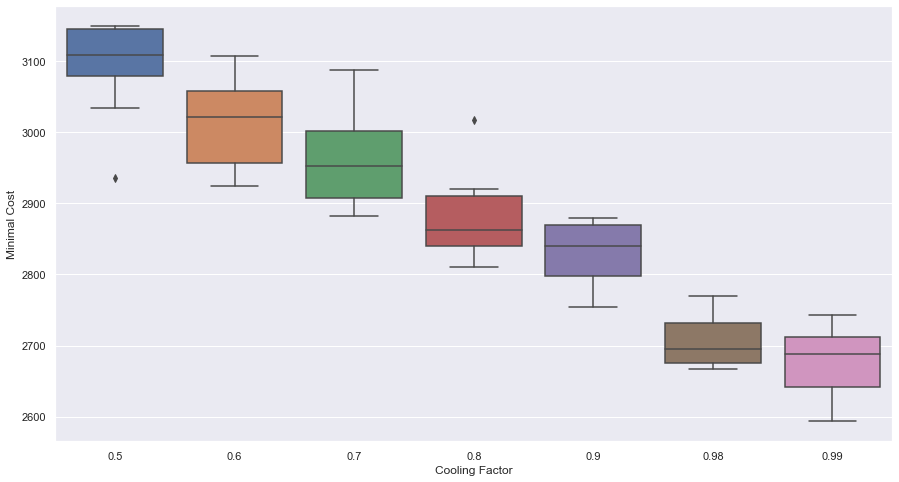

In [9]:
import seaborn as sns


sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.boxplot(x="Cooling Factor", y="Minimal Cost", data=df_1)



## stats for  different cooling factors - Markov chain = 10,000

In [81]:


# iterations  - temperature iterations
df_1.head()
df_stats = df_1[["Minimal Cost","iterations"]]
df_stats = df_stats.groupby("iterations")

df_stats_res = df_stats.describe()
df_stats_res

Minimal Cost                                                    \
                  count         mean        std          min          25%   
iterations                                                                  
18                 10.0  3094.133055  67.283698  2936.377944  3079.152130   
24                 10.0  3013.521534  61.331055  2925.103035  2957.246094   
35                 10.0  2964.848827  68.594359  2882.428066  2906.964341   
55                 10.0  2879.978096  59.914907  2810.389631  2840.460142   
116                10.0  2831.434011  45.581959  2753.581228  2797.405091   
605                10.0  2706.169135  37.121768  2666.974335  2675.365900   
1215               10.0  2679.477483  49.801194  2593.150614  2641.483313   

                                                   
                    50%          75%          max  
iterations                                         
18          3109.224013  3144.891796  3149.372156  
24          3021.372391  3057.658301  3107.993985  
35          2952.529856  3001.934752  3087.945525  
55          2862.942164  2910.316177  3016.948695  
116         2839.901471  2869.753366  2879.679707  
605         2694.655731  2732.188168  2769.134148  
1215        2687.689602  2712.311342  2742.506871

### Number of steps from T_start to T_end(i.e. number of steps taken to cool down the temperature)

In [48]:
df_1.head()
df_itr = df_1[["Minimal Cost","iterations"]]
df_itr = df_itr.groupby("iterations")

mean_df_itr = df_itr.mean()
mean_df_itr


,Minimal Cost
iterations,
18,3094.133055
24,3013.521534
35,2964.848827
55,2879.978096
116,2831.434011
605,2706.169135
1215,2679.477483


## Convergence line graph : Markov chain length = 10,000

In [30]:
df_line = df_1[["Minimal Cost","Cooling Factor"]]
df_line.head()

,Minimal Cost,Cooling Factor
0,3034.438875,0.5
1,3090.187536,0.5
2,3123.908856,0.5
3,3094.539169,0.5
4,3075.473661,0.5


In [50]:
grouped_df = df_line.groupby("Cooling Factor")
#grouped_df.head()

In [36]:

mean_df = grouped_df.mean()
mean_df

,Minimal Cost
Cooling Factor,
0.50,3094.133055
0.60,3013.521534
0.70,2964.848827
0.80,2879.978096
0.90,2831.434011
0.98,2706.169135
0.99,2679.477483


<AxesSubplot:xlabel='Minimal Cost', ylabel='Cooling Factor'>

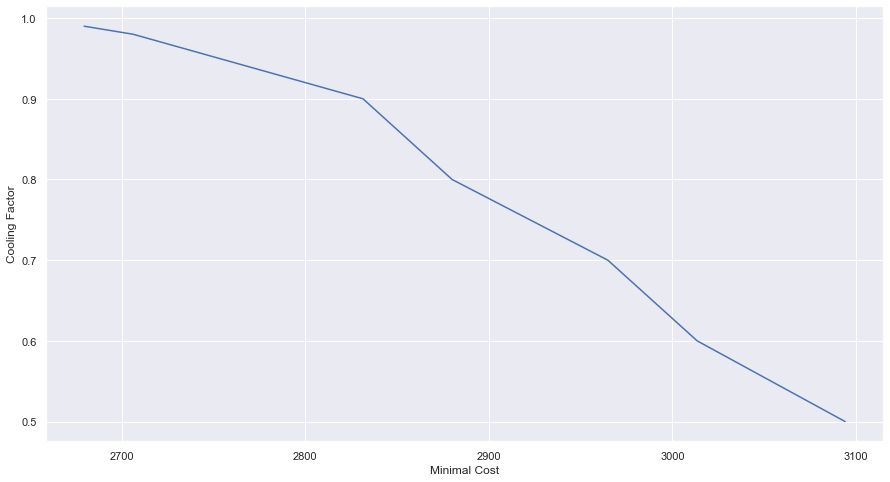

In [38]:
sns.lineplot(data=mean_df, x="Minimal Cost",y="Cooling Factor")

## Analysis of acceptance - rejection probability(for T_start to T_end) , cooling factor - 0.99 Markov chain = 10,000


In [71]:

from functions import distance_matrix
from functions import total_dist
from functions import generate_i_j
from functions import two_opt_swap

def comp_shortest_path_accept_reject(T_start, T_end, cooling_factor, nMarkov, coords, dataset, save_data=False):
    """Function that computes the shortest path for the Traveling Salesman Problem using Simulated Annealing.
       It also returns the acceptance probability of a new route from T_start to T_end

        Args:
            T_start (float): Starting temperature
            T_end (float): Temperature that determines when the Anealing process stops
            cooling_factor (float): determines the speed of the cooling process.
            nMarkov (int): Length of the markov chain
            coords (numpy.ndarray): coordinate array with tuples of city coordinates in the form: ()

        Returns:
            tuple: [0] final number of iterations, [1]minimal cost, [2]optimal cities list
    """
    T = T_start
    itr = 0
    matrix = distance_matrix(coords)

    route = np.arange(1,len(coords))
    np.random.shuffle(route)

     # starts and end at the first node in route/
    route = np.append(route,0)
    route = np.append(0,route)

    num_cities = len(route)

    old_cost = total_dist(route,matrix)
    min_cost = old_cost

    best_cost_till_now = []
    new_cost_arr = []

    new_cost = old_cost
    optimal_list_cities = route
    
    acceptance_probability = []
    temperature_range = []

   
    while T >= T_end:
        accepted_routes_T = 0
        for k in range(nMarkov):    # Markov
            i,j = generate_i_j(num_cities)

            new_cost = old_cost - (matrix[route[i-1]][route[i]] + matrix[route[j+1]][route[j]]) + (matrix[route[i-1]][route[j]] + matrix[route[j+1]][route[i]])
            #print(new_cost)

            cost_difference = new_cost - old_cost

            new_cost_arr.append(new_cost)


            if(new_cost < min_cost):
            #print(min_cost)
            #min_cost_arr.append(new_cost)
                min_cost = new_cost
                best_cost_till_now.append(min_cost)

            if(cost_difference < 0):
                prob = 1
            else:
                prob = np.minimum(math.exp(-cost_difference/T),1)

            random_num = np.random.uniform()
            #print(prob)

            # Accept it
            if(random_num <= prob):
                route = two_opt_swap(route,i,j)
                old_cost = new_cost
                optimal_list_cities = route
                accepted_routes_T +=1

        best_cost_till_now.append(min_cost)
        acceptance_probability.append(accepted_routes_T/nMarkov)
        temperature_range.append(T)


        itr = itr + 1
        T = T * cooling_factor
    
    best_cost_till_now_ar = np.asarray(best_cost_till_now)


    return itr, min_cost, optimal_list_cities,best_cost_till_now,acceptance_probability,temperature_range

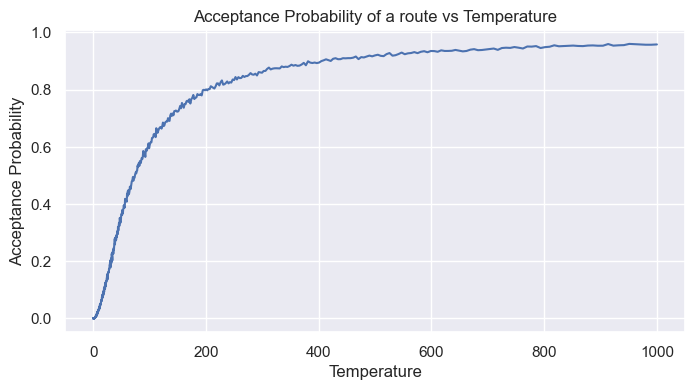

In [80]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(8, 4), dpi=100)

T_start = 1000
T_end = 0.005
cooling_factor_arr = [0.99]
nMarkov = 10000
num_simulations = 10

coords = read_tsp_file("TSP-Configurations/a280.tsp")
dataset = "a280"
acceptance_probability_arr = []

for cooling_factor in cooling_factor_arr:
    
    itr, min_cost, optimal_list_cities,local_minima_arr,acceptance_probability,temperature_range = comp_shortest_path_accept_reject(T_start, T_end, cooling_factor, nMarkov, coords, dataset=dataset, save_data=False)
    acceptance_probability_arr.append(acceptance_probability)
    xdata = temperature_range
    ydata = acceptance_probability

    plt.plot(xdata,ydata,label=cooling_factor)
    
plt.title("Acceptance Probability of a route vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Acceptance Probability")
plt.show()

    